<a href="https://colab.research.google.com/github/karunaprakash062/textbertintensorflow/blob/main/textbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
train_csv=pd.read_csv('/content/drive/MyDrive/train.csv')
cross_validation=pd.read_csv('/content/drive/MyDrive/cleaned_dev_data.csv')
test_cleaned=pd.read_csv('/content/drive/MyDrive/cleaned_test.csv')

In [4]:
# Drop rows that containing missing or null values.
test_cleaned.dropna(inplace=True)
# To reset the index after droping the rows
test_cleaned.reset_index(drop=True,inplace=True)
cross_validation.dropna(inplace=True)
cross_validation.reset_index(drop=True,inplace=True)

In [5]:
# creating a numpy array from the values in text column
text_data=np.array(train_csv['text'])

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [7]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [8]:
stop_words=stopwords.words('english')
lemmatizer=WordNetLemmatizer()

In [9]:
cleaned_data=[]

In [10]:
for text in text_data:
  text=text.lower()
    #statement1-removing special characters and Punctuation
  sentence=re.sub(r'[^\w\s]','',text)
    #statement2-removing numbers from text
  sentence=re.sub(r'[0-9]+','',sentence)
    #statement3-removing html tags and urls from text
  sentence = re.sub(r'<.*?>', '', sentence)
    #statement4-removing urls from text
  clean_text = re.sub(r'http\S+', '',sentence)
    #statement5-text to word tokenization
  sentence=nltk.word_tokenize(sentence)
    #statement6-removing stop_words
  i=0
  while i<3:
    sentence = [word for word in sentence if word.lower() not in stop_words]
    i=i+1
  lst=[]
   #statement7-lemmatization
  for word in sentence:
    lst.append(lemmatizer.lemmatize(word))
  #statement8-joing words to form sentence
  cleaned_text=' '.join(lst)
  cleaned_data.append(cleaned_text)

In [11]:
train_csv['cleaned_text']=cleaned_data

In [12]:
train_df = train_csv
valid_df = cross_validation
train_df.shape,valid_df.shape

((8500, 5), (500, 6))

In [13]:
import tensorflow as tf
import tensorflow_hub as hub

In [14]:
!pip install -q tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 62.8 MB/s eta 0:00:00


In [15]:
import tensorflow_text as text

In [16]:
pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.3 MB/s eta 0:00:00


In [17]:
pip install -q tflite-model-maker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.3/577.3 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 97.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 KB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 2.7 MB/s et

In [18]:
import official
from official import nlp
from official.nlp.bert import tokenization
from official.nlp.data import classifier_data_lib

In [19]:
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable=True)
# the path to the vocabulary file used by the BERT model
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
# boolean flag that indicates whether the text should be lowercased before tokenization.
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
# convert raw text into tokenized input sequences that can be fed to the BERT model. 
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [20]:
def bert_preprocess_text(dataframe):
    text = dataframe['text'].tolist()
    labels = dataframe['label'].tolist()
    # tokenize and preprocess text data
    text_tokens = [tokenizer.tokenize(t) for t in text]
    text_preprocessed = [tokenizer.convert_tokens_to_ids(tokens) for tokens in text_tokens]
    text_preprocessed = tf.keras.preprocessing.sequence.pad_sequences(
        text_preprocessed, maxlen=128, dtype='int32', padding='post', truncating='post', value=0)
    return np.array(text_preprocessed), np.array(labels)

In [21]:
train_x, train_y = bert_preprocess_text(train_df)
valid_x, valid_y = bert_preprocess_text(valid_df)

In [22]:
from keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2
from keras.metrics import AUC

In [26]:
input_word_ids = tf.keras.Input(shape=(None,), dtype=tf.int32, name="input_word_ids")
input_mask = tf.keras.Input(shape=(None,), dtype=tf.int32, name="input_mask")
input_type_ids = tf.keras.Input(shape=(None,), dtype=tf.int32, name="input_type_ids")
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])
dropout_output = tf.keras.layers.Dropout(0.4)(pooled_output)
final_output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout_output)
model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=final_output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='binary_crossentropy', metrics=[AUC()])
early_stopping = EarlyStopping(monitor='val_loss')

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [27]:
epochs=100
history = model.fit(
    x=[train_x, np.zeros_like(train_x), np.zeros_like(train_x)],
    y=train_y,
    validation_data=([valid_x, np.zeros_like(valid_x), np.zeros_like(valid_x)], valid_y),
    epochs=epochs,
    batch_size=32,
    use_multiprocessing=True,
    shuffle=True,callbacks=[early_stopping]
)

Epoch 1/100


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <bound method _BaseOptimizer._update_step_xla of <tensorflow.python.eager.polymorphic_function.tracing_compiler.TfMethodTarget object at 0x7fe0b3667af0>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <bound method _BaseOptimizer._update_step_xla of <tensorflow.python.eager.polymorphic_function.tracing_compiler.TfMethodTarget object at 0x7fe0b3667af0>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
266/266 [==============================] - ETA: 0s - loss: 0.6695 - auc: 0.5544

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Assign object at 0x7fe0a766f640>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Assign object at 0x7fe0a766f640>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
266/266 [==============================] - 287s 848ms/step - loss: 0.6695 - auc: 0.5544 - val_loss: 0.7913 - val_auc: 0.5700
Epoch 2/100
266/266 [==============================] - 240s 904ms/step - loss: 0.5866 - auc: 0.7105 - val_loss: 0.7859 - val_auc: 0.6152


In [28]:
import matplotlib.pyplot as plt

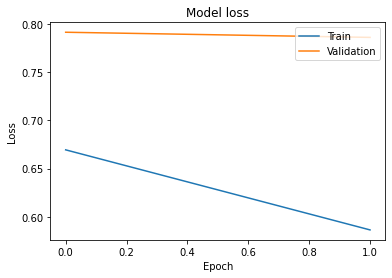

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()